# FAKE NEWS ANALYSIS USING ML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Reading The Datasets

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

# Data Cleaning and Preparing Process

In [6]:
# adding flag to track fake and real
fake['target']='fake'
true['target']='true'

In [7]:
# Concatenating dataframes
data=pd.concat([fake,true]).reset_index(drop=True)
data.shape

(44898, 5)

In [8]:
# shuffling the data
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)

In [9]:
data.head()

,title,text,subject,date,target
0,ECB's Rimsevics says Trump will be 'very good'...,RIGA (Reuters) - European Central Bank rateset...,politicsNews,"November 9, 2016",true
1,U.S. State Department says 'very concerned' ab...,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,"October 16, 2017",true
2,U.S. envoy Haley's blunt diplomacy targets Sou...,"JUBA, South Sudan/KITCHANGA, Democratic Republ...",worldnews,"October 29, 2017",true
3,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",News,"November 20, 2017",fake
4,Factbox - The four men charged in U.S. probe o...,(The Dec. 1 story was refiled to correct Gate...,politicsNews,"December 1, 2017",true


In [10]:
# Removing the data as we won't required in analysis
data.drop(['date'],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,ECB's Rimsevics says Trump will be 'very good'...,RIGA (Reuters) - European Central Bank rateset...,politicsNews,true
1,U.S. State Department says 'very concerned' ab...,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,true
2,U.S. envoy Haley's blunt diplomacy targets Sou...,"JUBA, South Sudan/KITCHANGA, Democratic Republ...",worldnews,true
3,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",News,fake
4,Factbox - The four men charged in U.S. probe o...,(The Dec. 1 story was refiled to correct Gate...,politicsNews,true


In [11]:
# Removing the title (we will use only the text)
data.drop(['title'],axis=1,inplace=True)
data.head()

,text,subject,target
0,RIGA (Reuters) - European Central Bank rateset...,politicsNews,true
1,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,true
2,"JUBA, South Sudan/KITCHANGA, Democratic Republ...",worldnews,true
3,"Yesterday, after the father of one of the UCLA...",News,fake
4,(The Dec. 1 story was refiled to correct Gate...,politicsNews,true


In [12]:
# convert to lowercase
data['text']=data['text'].apply(lambda x:x.lower())
data.head()

,text,subject,target
0,riga (reuters) - european central bank rateset...,politicsNews,true
1,washington (reuters) - the u.s. state departme...,worldnews,true
2,"juba, south sudan/kitchanga, democratic republ...",worldnews,true
3,"yesterday, after the father of one of the ucla...",News,fake
4,(the dec. 1 story was refiled to correct gate...,politicsNews,true


In [13]:
# Removing punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [18]:
data.head()

,text,subject,target
0,undercutting president trump s agenda is what ...,politics,fake
1,sarajevo reuters thousands of pensioners from...,worldnews,true
2,united nationswashington reuters the chairman...,politicsNews,true
3,the panama papers recently exposed the worst o...,News,fake
4,it would be great if her former running mate ...,politics,fake


# Data Exploration 

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


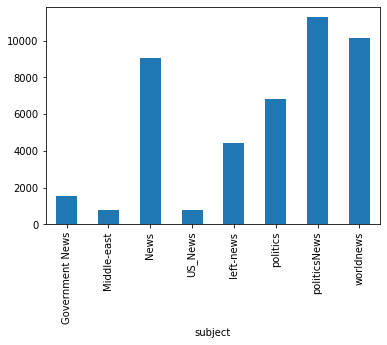

In [14]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


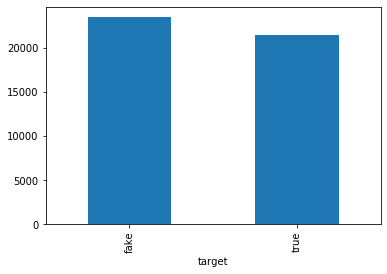

In [15]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

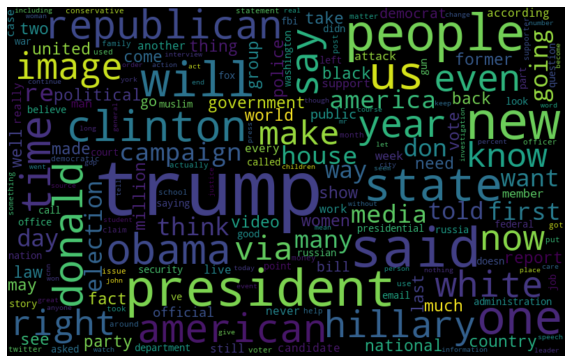

In [16]:
# Creating Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

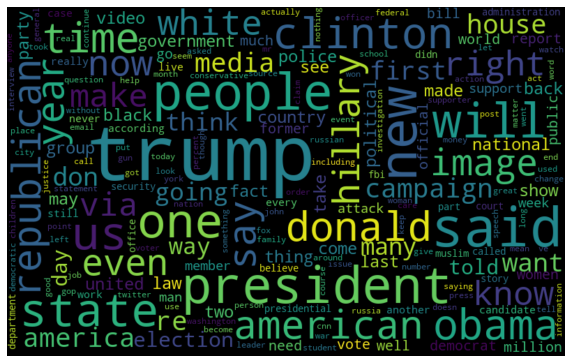

In [17]:
# Creating Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

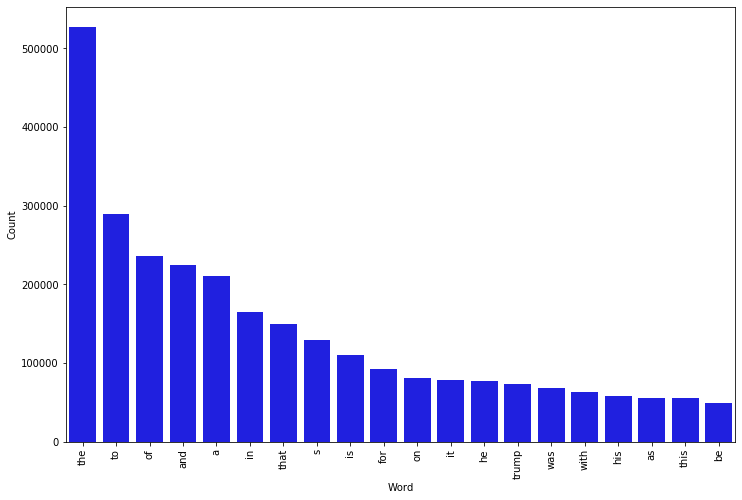

In [22]:
# Most frequent words in fake news
import nltk
counter(data[data["target"] == "fake"], "text", 20)

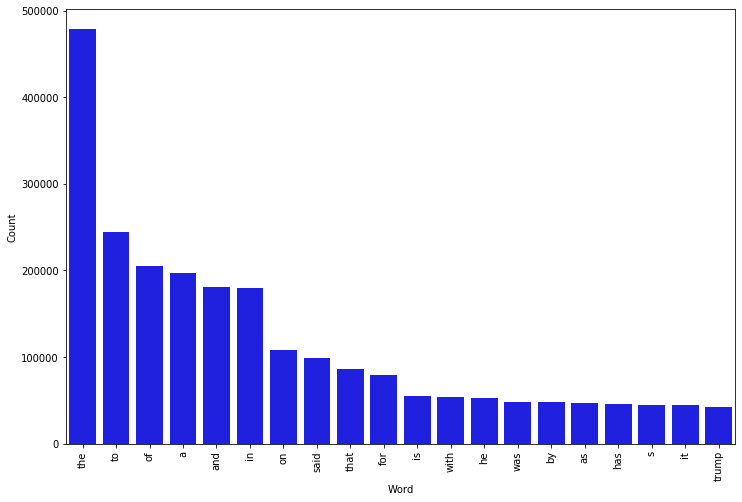

In [23]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)


# Model Preparation

In [24]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Preparing Data 

In [25]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [26]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.44%


Confusion matrix, without normalization


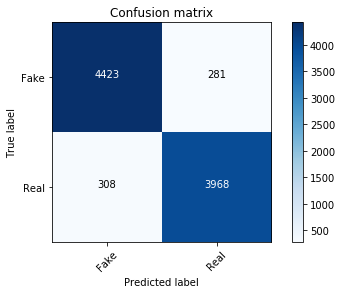

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.61%


Confusion matrix, without normalization


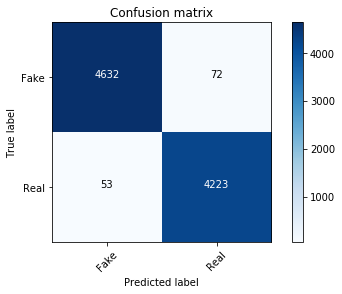

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.54%


Confusion matrix, without normalization


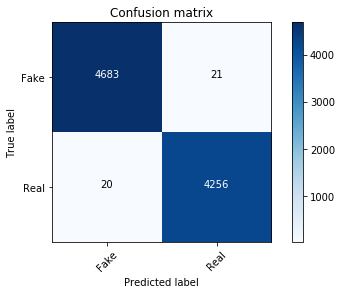

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.69%


Confusion matrix, without normalization


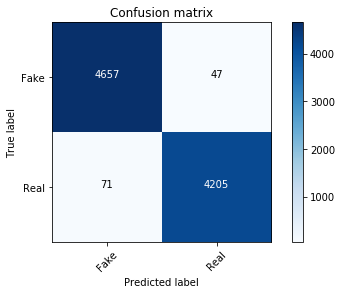

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Models Comparison

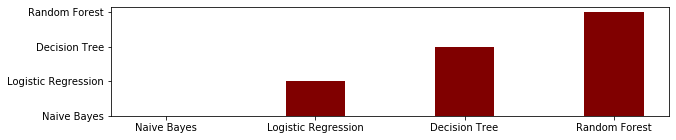

In [3]:
import matplotlib.pyplot as plt

data={'Naive Bayes':99,'Logistic Regression':98,'Decision Tree':99,'Random Forest':98}
item=list(data.keys())
values=list(data.keys())

fig = plt.figure(figsize = (10,2))
plt.bar(item, values, color ='maroon',width = 0.4)
plt.show()